<a href="https://colab.research.google.com/github/DWA-GIT/TESI-UNIFACISA/blob/master/KMeans(N%C3%A3o_Supervisionado)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


!pip install seaborn==0.9.0

In [0]:
import pandas as pd
uri_filmes = 'https://raw.githubusercontent.com/DWA-GIT/TESI-UNIFACISA/master/movies_novo.csv'
filmes = pd.read_csv(uri_filmes)
filmes.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
filmes.shape

(9742, 3)

In [0]:
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head(5)

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head(5)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
dados_dos_filmes.shape

(9742, 23)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
generos_escalados.shape

(9742, 20)

In [0]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
print(f'Grupos {modelo.labels_}')
modelo.labels_.shape

Grupos [ 3 18 13 ...  2  3 11]


(9742,)

In [0]:
print(generos.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [0]:
print(modelo.cluster_centers_)

[[-5.91799474e-02 -4.22634960e-01 -2.14435954e-01 -2.07759749e-01
  -2.70451223e-01 -7.92126305e-01 -2.68156992e-01 -2.17489438e-01
   9.49425781e-01 -8.24001216e-02 -9.49256298e-02 -3.27208348e-01
  -1.28397078e-01 -1.88418950e-01 -2.49986367e-01  2.25920562e+00
  -2.18143760e-01 -3.71675756e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91799474e-02 -2.54358001e-01 -3.51217210e-01 -2.51805035e-01
  -2.70451223e-01 -3.40125032e-01 -2.17362349e-01 -2.17489438e-01
  -5.68422921e-01  1.85703732e-02 -9.49256298e-02  2.99351719e+00
  -1.28397078e-01 -1.88418950e-01 -2.49986367e-01 -3.52572158e-01
  -3.34434762e-01  6.33187157e-01 -2.02019716e-01 -1.32065337e-01]
 [-5.91799474e-02 -3.66105537e-01 -2.81529411e-01 -2.58679155e-01
  -2.70451223e-01 -7.92126305e-01 -3.74631584e-01 -2.17489438e-01
   9.89092234e-01 -2.03526691e-01 -9.49256298e-02 -3.34055205e-01
  -1.28397078e-01 -1.88418950e-01 -2.49986367e-01 -4.42633460e-01
  -3.34434762e-01 -2.72509373e-02 -2.02019716e-01 -1.32065337e-01]
 [-5.91

In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.422635,-0.214436,-0.207760,-0.270451,-0.792126,-0.268157,-0.217489,0.949426,-0.082400,-0.094926,-0.327208,-0.128397,-0.188419,-0.249986,2.259206,-0.218144,-0.371676,-0.202020,-0.132065
1,-0.059180,-0.254358,-0.351217,-0.251805,-0.270451,-0.340125,-0.217362,-0.217489,-0.568423,0.018570,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.352572,-0.334435,0.633187,-0.202020,-0.132065
2,-0.059180,-0.366106,-0.281529,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.989092,-0.203527,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.027251,-0.202020,-0.132065
3,-0.059180,0.158378,0.887220,3.865793,1.584598,0.151158,-0.285292,-0.217489,-0.651500,0.725444,-0.094926,-0.257319,-0.128397,-0.188419,-0.178704,-0.312356,0.271931,-0.464772,-0.180418,-0.132065
4,-0.059180,2.080702,-0.223670,-0.219915,-0.270451,-0.340280,1.645113,-0.217489,-0.189574,-0.211648,-0.094926,-0.271507,-0.128397,-0.188419,-0.249986,-0.386768,-0.284441,0.971651,-0.202020,-0.132065
5,-0.059180,0.402104,0.034527,-0.200424,-0.259242,-0.467113,-0.297244,-0.190284,0.747226,-0.242736,-0.094926,-0.305855,-0.128397,-0.188419,-0.213968,-0.053385,-0.231129,-0.198602,4.950012,-0.132065
6,-0.059180,1.504018,2.578942,-0.258679,-0.270451,-0.362879,-0.362283,-0.217489,-0.516800,0.804508,-0.094926,-0.253060,-0.128397,-0.188419,-0.215502,-0.267261,0.980551,0.134046,-0.202020,-0.132065
7,-0.059180,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010
8,-0.059180,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
9,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f11b90f0518>,
      dtype=object)

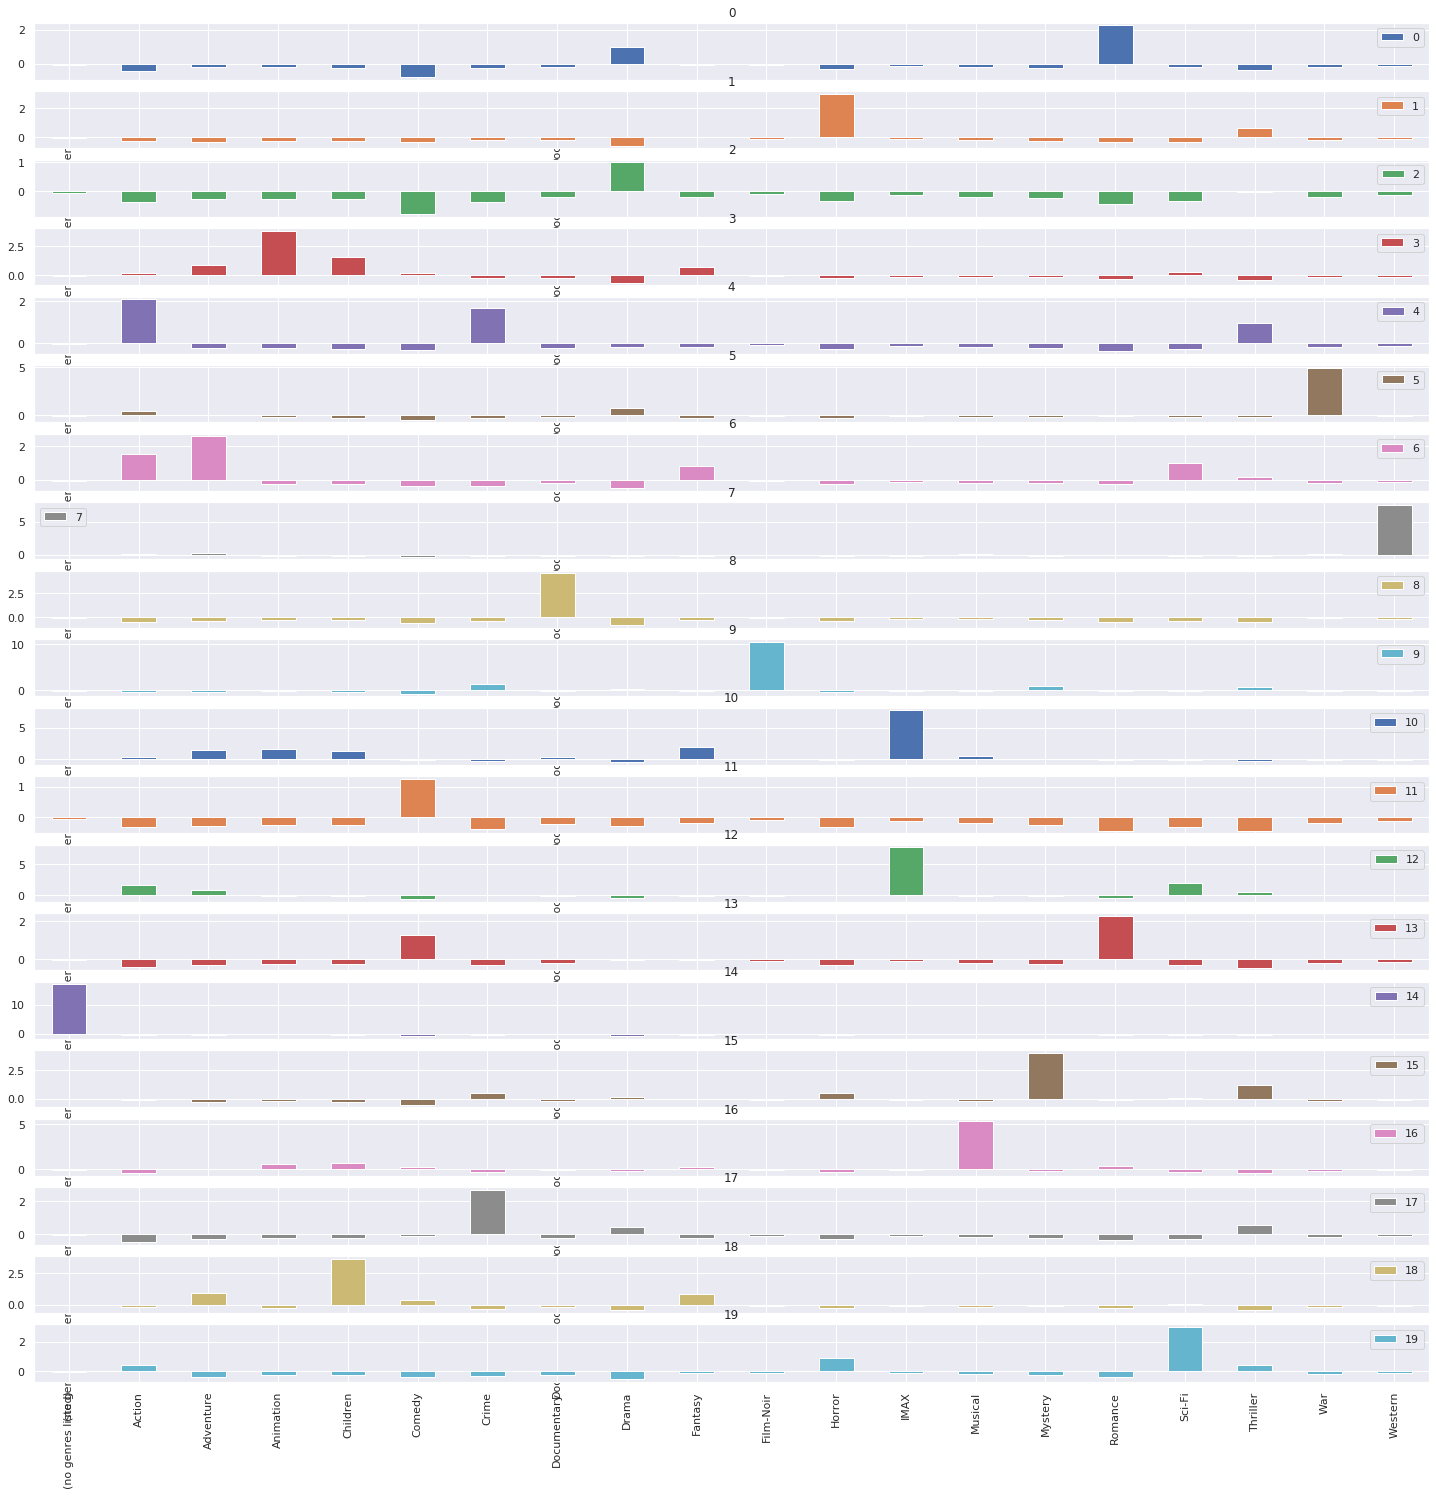

In [0]:
grupos.transpose().plot.bar(subplots=True,figsize=(25,25), sharex=False)

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE()

view = tsne.fit_transform(generos_escalados)
view

AttributeError: ignored

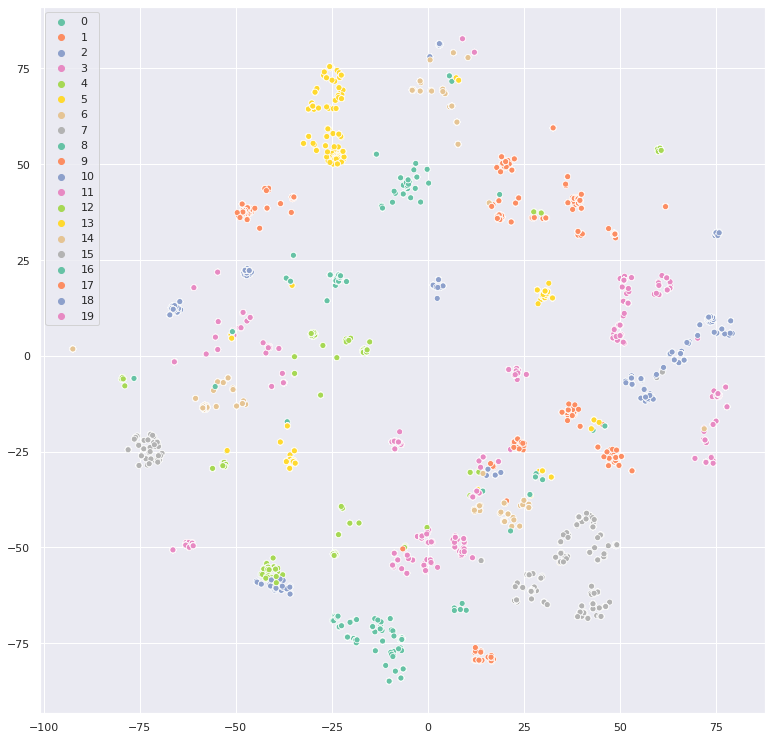

In [0]:
import seaborn as sns


sns.set(rc={'figure.figsize': (13,13)})

sns.scatterplot(x=view[:,0], y=view[:, 1], hue = modelo.labels_, palette=sns.color_palette(palette="Set2", n_colors=20))


In [0]:
def KMeans_func(numero_clusters, generos):
  modelo = KMeans(n_clusters=numero_clusters)
  modelo.fit(generos)
  return [numero_clusters, modelo.inertia_]


In [0]:
KMeans_func(20, generos_escalados)


[20, 54614.368525813734]

In [0]:
KMeans_func(3, generos_escalados)

[3, 167801.11407948003]

In [0]:
resultado = [KMeans_func(numero_grupos, generos_escalados) for numero_grupos in range (1,41)]
resultado

[[1, 194840.0],
 [2, 179483.94029403635],
 [3, 169432.72706296918],
 [4, 156277.63759131287],
 [5, 148081.4339020885],
 [6, 138566.5500924525],
 [7, 128621.56862899152],
 [8, 120224.0109735993],
 [9, 110541.16143706934],
 [10, 100536.8910743094],
 [11, 94955.76668163597],
 [12, 87229.73771778573],
 [13, 80289.92182717237],
 [14, 74087.66444978832],
 [15, 67357.82530527835],
 [16, 65710.07039922803],
 [17, 61576.085759248024],
 [18, 59357.111148614975],
 [19, 57276.776424520314],
 [20, 55851.59754281433],
 [21, 53647.513298687954],
 [22, 51486.51316665053],
 [23, 50088.784335506796],
 [24, 49354.3068720665],
 [25, 47702.75919974574],
 [26, 47080.320630354334],
 [27, 45711.75809045224],
 [28, 44904.653271077696],
 [29, 44121.25790707824],
 [30, 43107.46334211927],
 [31, 42097.94665934029],
 [32, 41570.68025210056],
 [33, 40099.26559625329],
 [34, 39868.66468349818],
 [35, 38708.532485843614],
 [36, 37746.00327861919],
 [37, 36563.81786165363],
 [38, 37213.43122526372],
 [39, 35957.007415

In [0]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])

resultado

,grupos,inertia
0,1,194840.000000
1,2,179483.940294
2,3,169432.727063
3,4,156277.637591
4,5,148081.433902
5,6,138566.550092
6,7,128621.568629
7,8,120224.010974
8,9,110541.161437
9,10,100536.891074


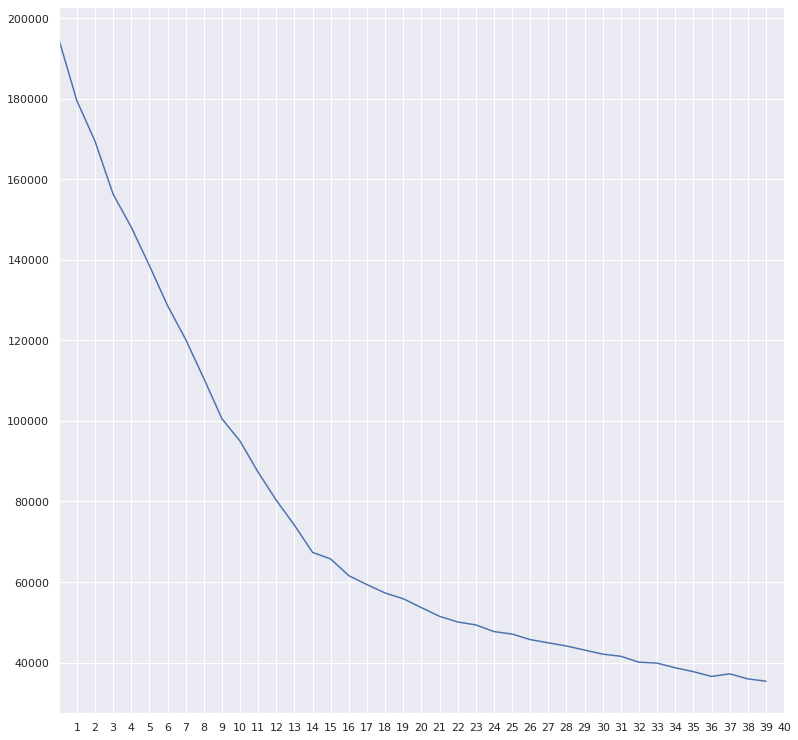

In [0]:
resultado.inertia.plot(xticks=resultado.grupos)